In [1]:
import pandas as pd
import numpy as np
import glob
import os
import ast
import matplotlib.pyplot as plt

In [6]:
pattern = 'hackathon/ds/*.json'
files = glob.glob(pattern)

In [10]:
all_jds = []

for file in files:
    if os.path.getsize(file) == 0:
        pass
    else:
        with open(file) as f:
            lines = ast.literal_eval(f.read())
            all_jds.extend([job['description'] for job in lines])

In [12]:
df = pd.DataFrame({'description':all_jds})

In [14]:
df.description = df.description.str.lower()

In [16]:
df['python'] = df.description.str.contains('python').astype(int)

In [18]:
df['java'] = df.description.str.contains('java').astype(int)

In [19]:
df['r'] = df.description.str.contains(' r ').astype(int)

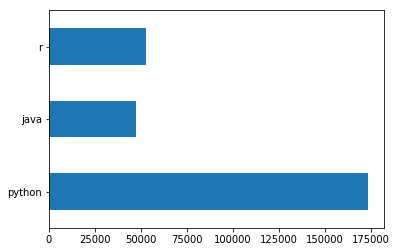

In [23]:
df.drop('description', axis=1).sum(axis=0).plot(kind='barh')

In [24]:
df.iloc[:100,1:].to_csv('2019-08-29_program-lang.csv', index=False)

# Automation

In [11]:
def do_analysis(filename):
    if filename[-4:] == '.csv':
        df2 = pd.read_csv(filename)
    if filename[-5:] == '.xlsx':
        df2 = pd.read_excel(filename)
        
    df2.sum(axis=0).rename('frequency').to_frame()
    new_title = filename[:11] + 'analysis.csv'
    df2.to_csv(new_title)

In [12]:
do_analysis('2019-08-29_program-lang.csv')